# Udacity P1 - A Ciencia das Escolhas

Este projeto analisa um conjunto de dados de um teste utilizando o efeito stroop (https://en.wikipedia.org/wiki/Stroop_effect)

Neste estudo,vamos fazer os teste em duas situações:

Congruente - Quando as palavras são congruentes a sua cor

Incongruente - Quando as palavras são incongruentes com a sua cor

## 1 - Qual é a nossa variável independente? Qual é a nossa variável dependente?

a) <b>Variável Independente</b> - Congruência entre as palavras e as cores

b) <b>Variável Dependente</b> - Tempo para completar a tarefa

## 2 - Qual seria um conjunto apropriado de hipóteses para essa tarefa? Que tipo de teste estatístico você espera executar? Justifique suas escolhas.

a) Os tipos de hipótesis seriam: Nula e Alternativa

   - <b>Nula</b>: O tempo médio para completar tarefa congruente é igual ao tempo médio para completar a tarefa incongruente
    
   <b>H0: μ1 = μ2</b> ou <b>H0: μ1 - μ2 = 0</b>
    
   <b>H0</b> = a hipótese nula
   
   <b>μ1</b> = a média da população 1
   
   <b>μ2</b> = a média da população 2
   
    
   - <b>Alternativa</b> - O tempo médio para completar a tarefa congruente é diferente do tempo médio para completar a tarefa incongruente
    
   <b>Ha: μ1 ≠ μ2</b> ou <b>Ha: μ1 - μ2 ≠ 0</b>
    
   <b>Ha</b> = a hipótese alternativa
   
   <b>μ1</b> = a média da população 1
   
   <b>μ2</b> = a média da população 2

b) Tipo de teste apropriado seria o <b>t-test para amostras dependentes</b>, devido a alguns fatores:
    
    1 - Desvio padrão desconhecido;
    
    2 - Mesma amostra testada sobre duas condições diferentes



## 3 - Reporte alguma estatística descritiva em relação a esse conjunto de dados. Inclua, pelo menos, uma medida de tendência central de pelo menos uma medida de variabilidade.

In [5]:
import pandas as pd

# Lendo o arquivo .csv
stroop = pd.read_csv("stroopdata.csv")

In [6]:
# Imprimindo os dados
print(stroop)

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


In [7]:
# Visualização das Estatísticas Descritivas
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [9]:
# Visualizando as medianas
congruentes = stroop['Congruent']
incongruentes = stroop['Incongruent']
congruentes.median(), incongruentes.median()

(14.3565, 21.0175)

## 4 - Forneça uma ou duas visualizações que mostre a distribuição da amostra de dados. Escreva uma ou duas sentenças sobre o que você observou do gráfico ou gráficos.

In [16]:
# Visualizando os gráficos no notebook e não em uma nova janela
%pylab inline

# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


<b>a) Visualização do Gráfico dos Incongruentes</b>

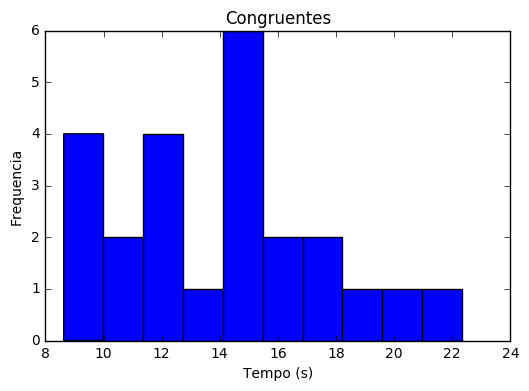

In [56]:
plt.hist(congruentes)
plt.xlabel("Tempo (s)")
plt.ylabel("Frequencia")
plt.title("Congruentes")
plt.show()

<b>b) Visualização do Gráfico dos Incongruentes</b>

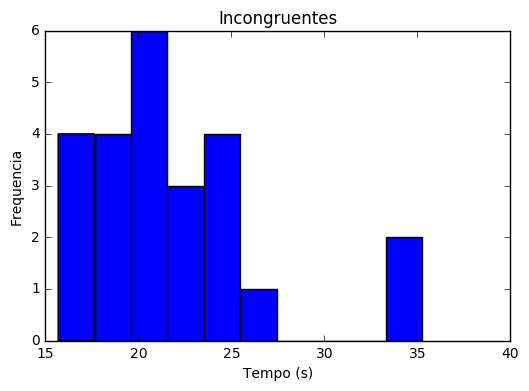

In [55]:
plt.hist(incongruentes)
plt.xlabel("Tempo (s)")
plt.ylabel("Frequencia")
plt.title("Incongruentes")
plt.show()

<b>c) Visualização do Gráfico da diferença entre Congruentes e Incongruentes</b>

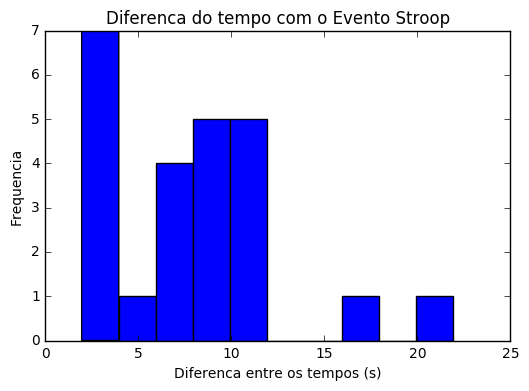

In [57]:
stroop['difference'] = stroop['Incongruent'] - stroop['Congruent']
diferenca = stroop['difference']

plt.hist(diferenca)
plt.xlabel("Diferenca entre os tempos (s)")
plt.ylabel("Frequencia")
plt.title("Diferenca do tempo com o Evento Stroop")
plt.show()

<b>d) Observações</b>

1) Nos dois gráficos, podemos observar que a média está condizendo com os picos, sinalizando uma distribuição normal

## 5 - Agora desempenhe o teste estatístico e reporte seus resultados. Qual seu nível de confiança e o valor estatístico crítico? Você rejeitou a hipótese nula ou falhou ao tentar rejeitá-la? Encontre uma conclusão em relação ao experimento da tarefa. Os resultados estão de acordo com suas expectativas?

In [43]:
stroop.describe()

,Congruent,Incongruent,difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


<b>Alpha level:</b> .05

<b>Degrees of Freedom:</b> 23

<b>t-critical:</b> +/- 2.069

<b>Mean difference:</b> 7.964792

<b>Standard deviation:</b> 4.86

In [52]:
from math import sqrt

mean = 7.964792
std = 4.86
sem = 4.86 / sqrt(24)

tstatistic = mean / sem
print "t-statistic =", tstatistic 

t-statistic = 8.02867337753


<b>H0:</b> Rejeitamos a hiopótese nula, pois o valor está dentro da zona crítica de t

<b>Conclusão:</b> Os valores obtidos nos teste Incongruente são significantemente diferente e maiores que os valores obtidos nos testes Congruentes, chegando a conclusão que não podemos trabalhar com a hipótese nula neste caso.

## 6 - Opcional: O que você acha que é responsável pelo efeito observado? Consegue pensar em uma alternativa ou tarefa similar que resultaria em um efeito parecido? Alguma pesquisa em relação ao problema pode ser útil para pensar nessas duas questões!

a) Creio que essa diferença seja ocasionada pela associação entre palavra e cor na cabeça das pessoas. Nosso aprendizado de assimilação foi feito desta forma, o que torna mais complicado na hora de ler, pois temos que dissociar a palavra escrita da cor que aparece na palavra.

b) Se colocassemos pessoas para digitarem um SMS ou mensagem de WhatsApp em um teclado padrão de celular e depois em um teclado de celular com as teclas embaralhadas. O tempo de digitação seria relativamente maior em relação ao teclado que elas estão habituadas a usar no dia a dia.